### Model Architecture

![](cover.png)

### Importing essential libraries and Model building(CNN)

Here we use Keras which is a high-level neural network library, which runs on top of TensorFlow. Using Keras allows for easy and fast prototyping.
We are building a sequential model which is a linear stack of layers. We also use different types of layers such as Dense, Conv2D, Flatten etc. at different points in the model.
The pickle library is used here for loading and reading data from respective pickle files.
We'll use matplotlib to generate graphs for better visualization of model performance.

In [1]:
#Following are the essential libraries for the required CNN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
import pickle
import matplotlib.pyplot as plt


#Loading and reading previously made pickle data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))


#Normalizing X(image_input)
X = X/255.0
y = to_categorical(y)


# Code for required model
model = Sequential()    # Since it's a sequential model 


# Adding two Conv2D layers with different number of units(nodes/neurons), kernel_size of 3 and activation_function 'relu'
# Padding set to 'same' so that the outcome remains the same as kernel_size/window
# Followed by a MaxPooling layer of size 2
# And a Dropout layer, that drops out 25% of neurons
# Conv2D --> Conv2D --> MaxPool --> Dropout
model.add(Conv2D(50, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = X.shape[1:]))
model.add(Conv2D(40, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.25))


# Adding one more Conv2D layers with same kernel size, padding and activation function
# Followed by a MaxPool of size 2 and a Dropout of 40% neurons
model.add(Conv2D(50, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(MaxPool2D(2))
model.add(Dropout(0.40))


# Flattening the data for input of dense layer 
model.add(Flatten())


# Adding dense layer with 128 units and activation function 'relu'
# Followed by a dropout
# Followed by a Dense layer which is our output layer. The layer has the same number of units as the total number of classes
# Activation used here is 'softmax' that ensures that predictions sum up to 1, in order to be interpretted as probabilities
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.50))
model.add(Dense(7, activation = 'softmax'))
model.summary()


# Compiling the model
# Optimizer used --> 'adam'
# Loss function used --> 'categorical_crossentropy', used for multi-class classification
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


# Learning rate reduction using ReduceLROnPlteau(keras callback) to be used when val_accuracy reaches a plateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.4, 
                                            min_lr=0.00001)


# Setting a checkpoint using ModelCheckpoint(keras callback) to be used to save weights for when val_accuracy is at its best 
checkpoint = ModelCheckpoint('weights2.hdf5', monitor = 'val_accuracy', save_best_only = True)


# Fitting the model
# batch_size --> 35, epochs --> 35, validation split of 15%
# callbacks --> learning rate reduction & checkpoint 
training = model.fit(X, y, batch_size = 35, epochs = 35, validation_split = 0.15, callbacks = [learning_rate_reduction, 
                                                                                               checkpoint])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 50)      500       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 40)        18040     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 40)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 40)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 49, 50)        18050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 50)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 50)        0

### Saving the model

In [8]:
from tensorflow.keras.models import load_model
model.save('model_file.h5')

### Loss and Validation_loss graph

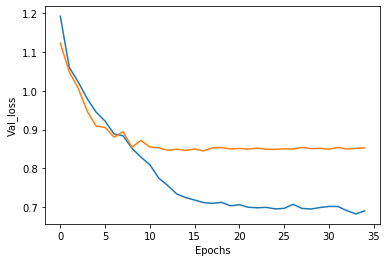

In [5]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Val_loss')
plt.show()

### Accuracy and Validation_accuracy graph

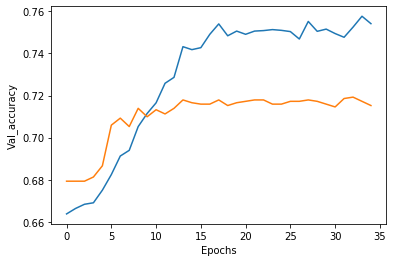

In [6]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Val_accuracy')
plt.show()

### Conclusion

As we can see from the respective accuracy and loss graphs that the model experiences slight overfitting after the 10th epoch. We have managed to keep the overfitting significantly low by reducing learning rate by 40% at every plateau.

Our current data set has approximately 10,000 images, which is quite low given that there are seven different classes. It lacks images in a few classes.
With a bigger dataset we can avoid overfitting to a greater extent and achieve an even better accuracy. 

We have managed to achieve a validation accuracy of 71.92%